# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

## Objectives

You will be able to:
* Solve the monty hall problem using simulations

## Run a Simulation

This is not a traditional application of Bayes' Theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool of Bayesian's&mdash;running a simulation. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
#Your code here
def simulate(stay = False):
    gates = [0,1,2]
    car = int(np.random.choice(gates,1))
    prices = ["car" if x == car else "goat" for x in range(3)]
    #print (prices)
    #print(f"car at {car}")
    player_choice = int(np.random.choice(gates,1))
    #print(f"1st Pick :{player_choice}")
    if prices[player_choice] == "car":
    #    print("won 1st pick")
        return True
    for i in range(3):
        if i not in [player_choice, car]:
            gates.pop(i)
    #        print(f"revealed {prices[i]} at gate {i}, wanna switch?")
    if not stay:
        player_choice = int(np.random.choice(gates,1))
    #    print("Yes")
    #    print(f"2nd Pick :{player_choice}")
    #else:
    #    print("No")
    return prices[player_choice] == "car"
    

In [142]:
n_sim = 1000
stay_wins = []
change_wins = []
for i in range(n_sim):
    stay_wins.append(simulate(stay = True))
    change_wins.append(simulate(stay = False))
print(f"Change: {sum(change_wins)/n_sim} , Stay {sum(stay_wins)/n_sim}")

Change: 0.652 , Stay 0.343


Text(0, 0.5, 'Win%')

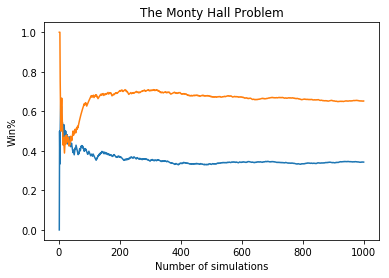

In [143]:
x = range(1,1001)
y1 = np.asarray(stay_wins).cumsum()/x
y2 = np.asarray(change_wins).cumsum()/x
plt.plot(x,y1)
plt.plot(x,y2)
plt.title("The Monty Hall Problem")
plt.xlabel("Number of simulations")
plt.ylabel("Win%")

## Summary

In this lab you further investigated the idea of Bayes' Theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully this was an entertaining little experience! 